In [2]:
import pandas as pd

In [3]:
path_to_excel_file = "Sample_Customore_Traffic raw.xlsx"
df = pd.read_excel(path_to_excel_file)
df = df.drop(df.index[-1])
print(df)

                                       Source / Medium   Users  New Users  \
0                                         google / cpc  407950     344502   
1                                     youtube / social   77785      55537   
2                                    (direct) / (none)   64653      60181   
3                                    facebook / social   48721      32781   
4                               youtube.com / referral   27718      17774   
..                                                 ...     ...        ...   
192                      web.start.fyi / local_display       1          0   
193  www-dienmayxanh-com.cdn.ampproject.org / local...       1          0   
194                      xiaomiviet.vn / local_display       1          0   
195                           xnxx.com / local_display       1          0   
196                                   zalo / (not set)       1          1   

     Sessions  Bounce Rate  Pages / Session  Avg. Session Duration  \
0    

In [4]:
last_column_values = []
for column in df.columns:
    last_value = df[column].iloc[-1]
    last_column_values.append(last_value)
last_column_values

['zalo / (not set)', 1, 1, 1, 1.0, 1.0, 0.0, 0.0, 0, 0.0]

In [6]:
new_source = []
new_medium = []
for value in df["Source / Medium"]:
    if str(value) == 'nan':
        pass
    else:
        value = str(value)
        value = value.split("/")
        new_source.append(value[0].strip())
        new_medium.append(value[1].strip())
df["new_source"] = new_source
df["new_medium"] = new_medium
print(df)

                                       Source / Medium   Users  New Users  \
0                                         google / cpc  407950     344502   
1                                     youtube / social   77785      55537   
2                                    (direct) / (none)   64653      60181   
3                                    facebook / social   48721      32781   
4                               youtube.com / referral   27718      17774   
..                                                 ...     ...        ...   
192                      web.start.fyi / local_display       1          0   
193  www-dienmayxanh-com.cdn.ampproject.org / local...       1          0   
194                      xiaomiviet.vn / local_display       1          0   
195                           xnxx.com / local_display       1          0   
196                                   zalo / (not set)       1          1   

     Sessions  Bounce Rate  Pages / Session  Avg. Session Duration  \
0    

In [7]:
import plotly.graph_objects as go

# Tính tổng số Users của từng loại Medium
medium_users = df.groupby('new_medium')['Users'].sum()

# Tạo đối tượng Pie
fig = go.Figure(data=go.Pie(labels=medium_users.index, values=medium_users))

# Đặt tiêu đề và các thuộc tính của biểu đồ tròn
fig.update_layout(
    title="Phân bổ Users theo Medium",
    showlegend=True,
)

# Hiển thị biểu đồ
fig.show()


In [9]:
category_by_profit = df.groupby(['new_source', 'new_medium'])['Users'].sum().reset_index()
category_by_profit.sort_values('Users', ascending=False, inplace=True)
fig = go.Figure()
for category in category_by_profit['new_medium'].unique():
    data = category_by_profit[category_by_profit['new_medium'] == category]
    fig.add_trace(go.Bar(
        x=data['new_source'],
        y=data['Users'],
        name=category
    ))
fig.update_layout(
    title='Profit by Sub-Category within Each Category',
    xaxis=dict(title='Sub-Category'),
    yaxis=dict(title='Profit'),
    barmode='group',
    legend_title='Category'
)

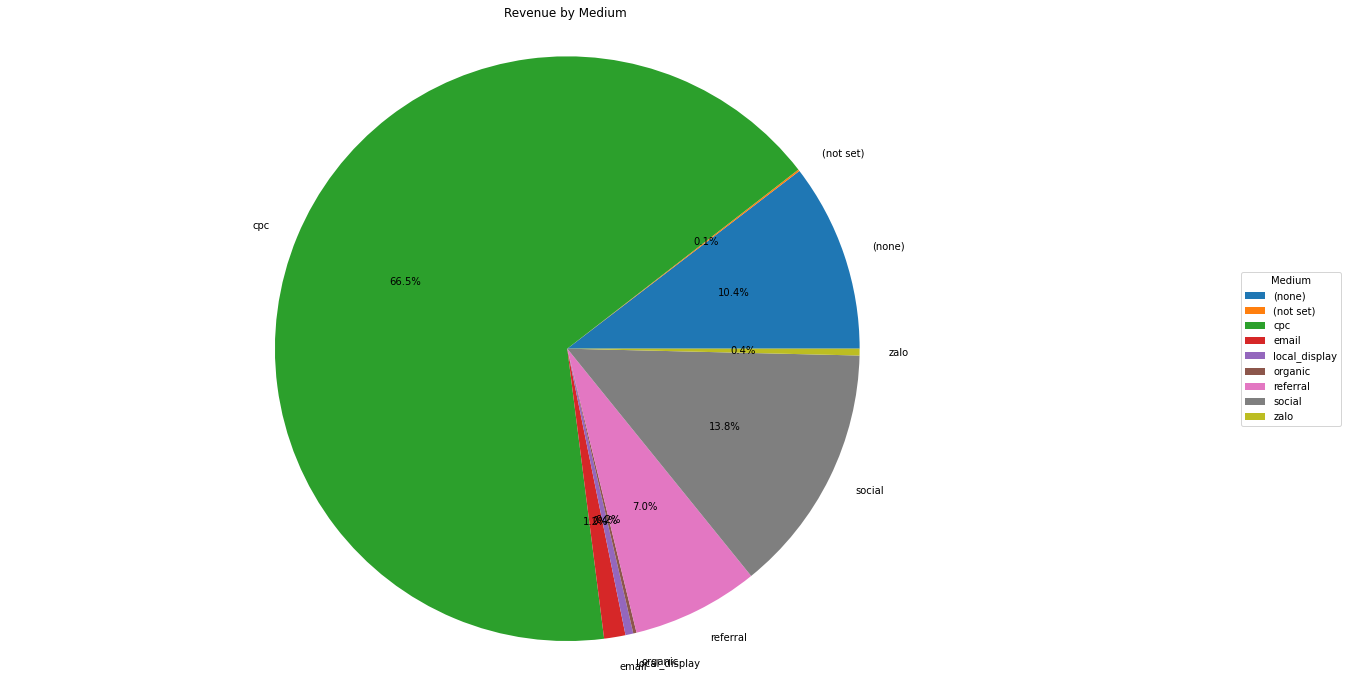

In [31]:
import matplotlib.pyplot as plt
revenue_by_medium = df.groupby('new_medium')['Revenue'].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(20, 12))
plt.pie(revenue_by_medium, labels=revenue_by_medium.index, autopct='%1.1f%%')
plt.legend(title='Medium', loc='right', bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.title('Revenue by Medium')
plt.show()

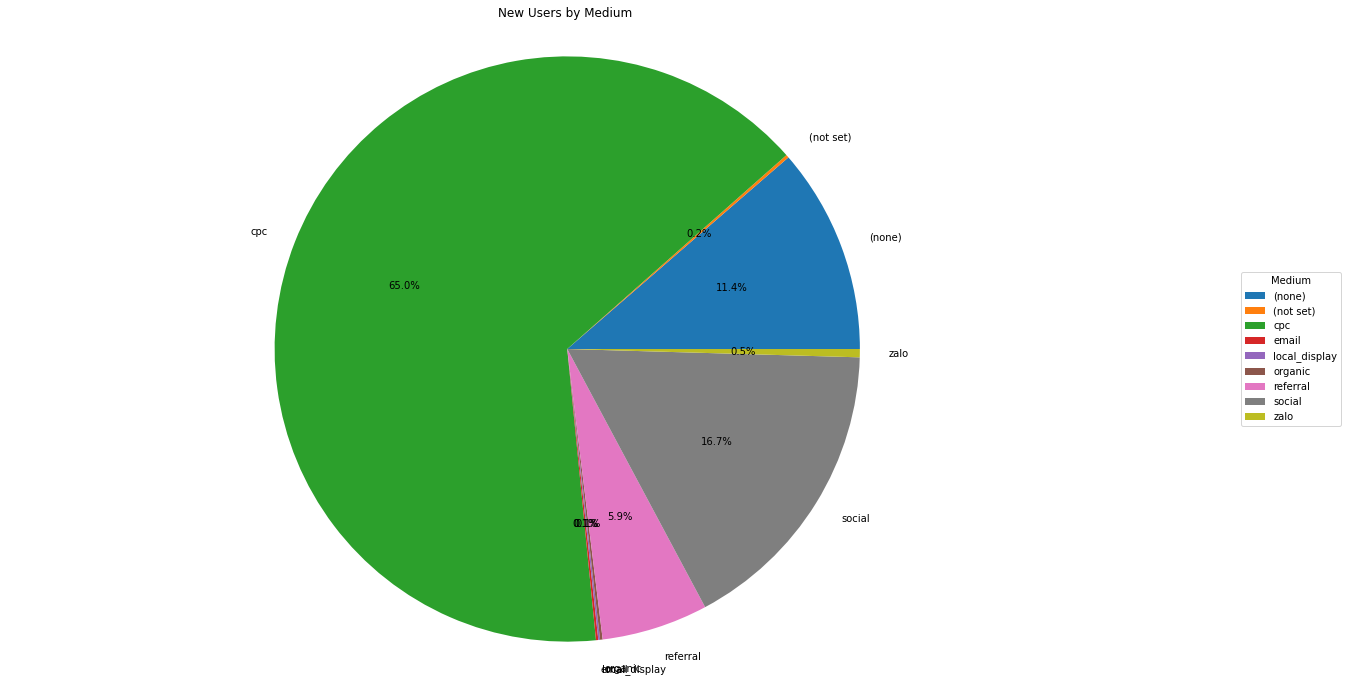

In [35]:
new_user_by_medium = df.groupby('new_medium')['New Users'].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(20, 12))
plt.pie(new_user_by_medium, labels=new_user_by_medium.index, autopct='%1.1f%%')
plt.legend(title='Medium', loc='right', bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.title('New Users by Medium')
plt.show()

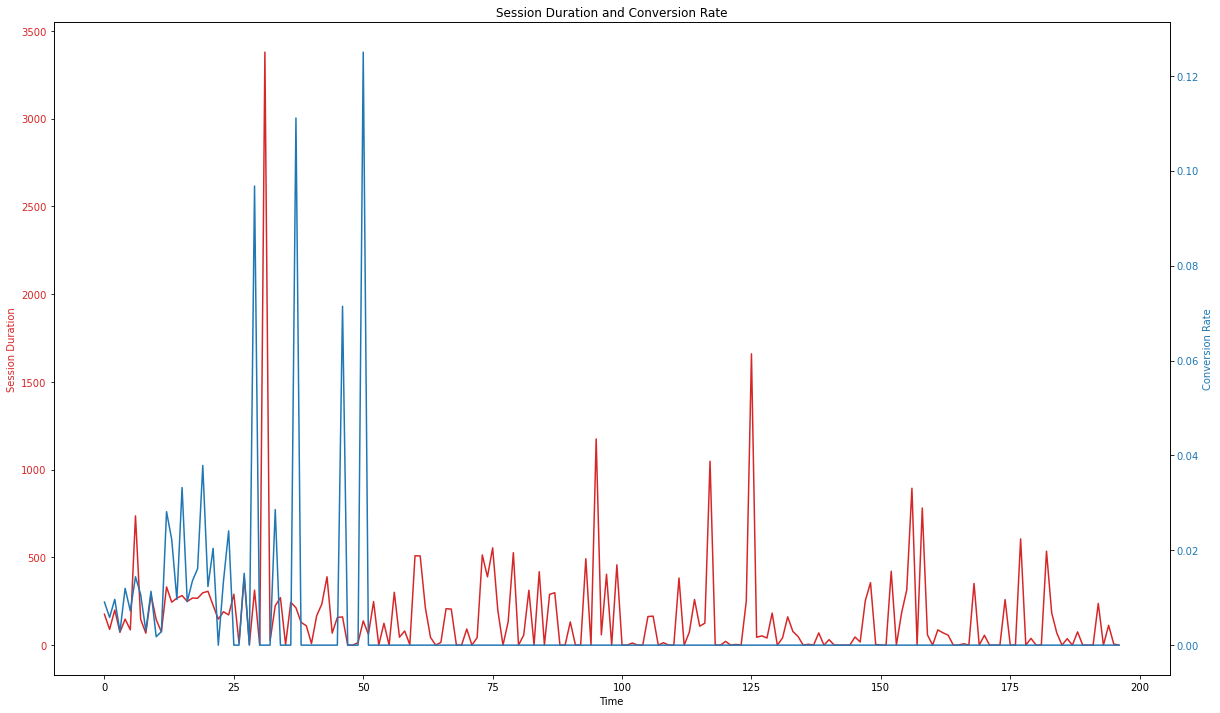

In [39]:
fig, ax1 = plt.subplots(figsize=(20, 12))

# Vẽ biểu đồ line cho session duration
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Session Duration', color=color)
ax1.plot(df['Avg. Session Duration'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Tạo trục y phụ cho conversion rate
ax2 = ax1.twinx()

# Vẽ biểu đồ line cho conversion rate
color = 'tab:blue'
ax2.set_ylabel('Conversion Rate', color=color)
ax2.plot(df['Ecommerce Conversion Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Đặt tiêu đề cho biểu đồ
plt.title('Session Duration and Conversion Rate')

# Hiển thị biểu đồ
plt.show()



